# Data loading

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

In [45]:
data_path = 'train.csv' 
df = pd.read_csv(data_path)

In [46]:
df.head(8)

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,6622,ecom,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,2020-04-21 16:04:41.817367072
1,2047,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,2024-07-19 23:50:07.268931816
2,1118,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,2024-07-13 16:35:54.794883135
3,4992,news,89534.0,924.0,0,834,0,0,2.149243,-0.093360,2024-09-10 21:29:14.006315095
4,9970,information_source,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,2024-05-26 11:07:15.950527838
5,5505,ecom,3060369.0,0.0,1945683,51293,0,NaN,8.586621,0.640110,2022-07-25 16:59:56.675929416
6,4553,porn,99712.0,0.0,0,0,15178,3725,20.786928,0.063572,2023-04-26 05:40:15.012475568
7,1176,ecom,31677060.0,8760379.0,0,924098,0,8519,8.066347,0.080541,2024-02-19 13:16:17.401183524


# Анализ и визуализация данных

In [47]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             8000 non-null   int64  
 1   category               8000 non-null   object 
 2   clicks                 7727 non-null   float64
 3   likes                  7624 non-null   float64
 4   buys                   8000 non-null   int64  
 5   4xx_errors             8000 non-null   int64  
 6   5xx_errors             8000 non-null   int64  
 7   complaints_count       7527 non-null   object 
 8   average_dwelltime      8000 non-null   float64
 9   source_attractiveness  8000 non-null   float64
 10  date_of_registration   8000 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 687.6+ KB


,Unnamed: 0,clicks,likes,buys,4xx_errors,5xx_errors,average_dwelltime,source_attractiveness
count,8000.000000,7.727000e+03,7.624000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8000.000000,8000.000000
mean,5006.138875,2.749785e+06,5.985027e+05,5.810509e+05,8.204958e+04,2.769224e+04,6.979549,0.191997
std,2893.886162,4.699120e+06,1.978345e+06,2.262221e+06,1.555219e+05,7.946935e+04,10.004924,0.227873
min,0.000000,5.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,-0.681718
25%,2493.250000,3.599210e+05,0.000000e+00,0.000000e+00,2.943000e+03,0.000000e+00,1.503928,0.038220
50%,5035.000000,1.097221e+06,3.399550e+04,0.000000e+00,2.671750e+04,0.000000e+00,4.022802,0.154256
75%,7521.250000,2.915358e+06,2.860638e+05,0.000000e+00,9.500225e+04,2.016375e+04,8.899400,0.282510
max,9999.000000,6.203206e+07,5.582181e+07,4.277391e+07,2.904996e+06,1.865588e+06,211.218066,1.355736


In [11]:
df['source_attractiveness'].mean(), df['source_attractiveness'].median()

(0.19199688460706613, 0.1542557099964202)

<Axes: >

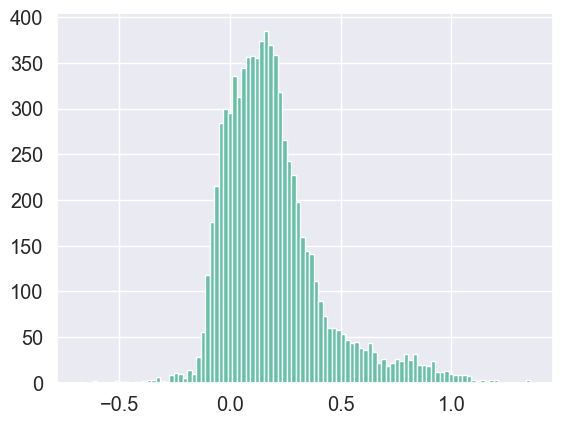

In [48]:
df['source_attractiveness'].hist(bins=100)

Тут видно, что распределие у нашего таргета схоже к нормальному

Пошаманим с последним столбцом, где содержится дата регистрации, его можно преобразовать в еще один признак: возраст домена

In [50]:
df['date_of_registration'] = pd.to_datetime(df['date_of_registration'], errors='coerce')

df['domain_age'] = (pd.Timestamp('2024-10-15') - df['date_of_registration']) / pd.Timedelta(days=365)

df.head(3)

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration,domain_age
0,6622,ecom,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,2020-04-21 16:04:41.817367072,4.485836
1,2047,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,2024-07-19 23:50:07.268931816,0.238375
2,1118,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,2024-07-13 16:35:54.794883135,0.255639


In [51]:
categorial_features = ['category'] # категориальный
real_features = ['clicks', 'likes', 'buys', '4xx_errors', '5xx_errors', 'complaints_count', 'average_dwelltime', 'domain_age'] # вещественные
target_features = 'source_attractiveness' # целевой

У нас в данных есть занчения NaN. Обнулим значения NaN. Приведем `complaints_count` к int64. Для того, чтобы визуализировать данные.

In [54]:
df['complaints_count'] = pd.to_numeric(df['complaints_count'], errors='coerce')
df.fillna(0, inplace=True)



Гистограммы для вещественных признаков

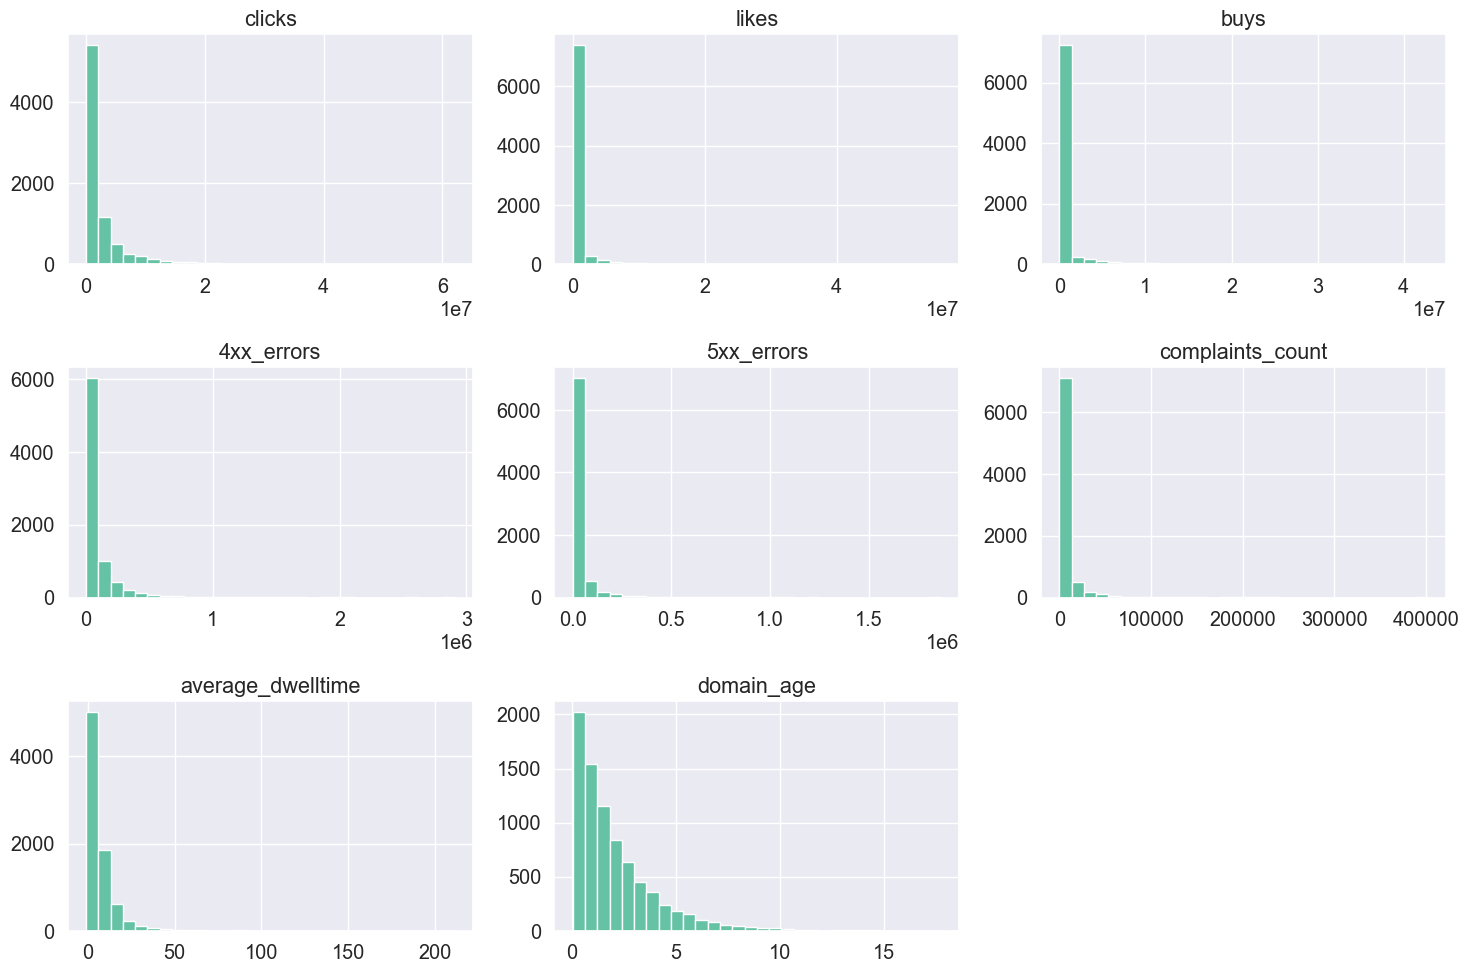

In [55]:
df[real_features].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

Из графиков видно, что почти во всех вещественных признаках у нас большое количество нулей, это говорит о том, что у нас много сайтов, которые  были запущены менее года назад, график `domain_age` об этом свидетельствует. Не все сайты нацелены на получение прибыли лайков. Также это может сказать о том, что нужно анализировать данные дальше, нужен анализ с участием категориальных признаков. 

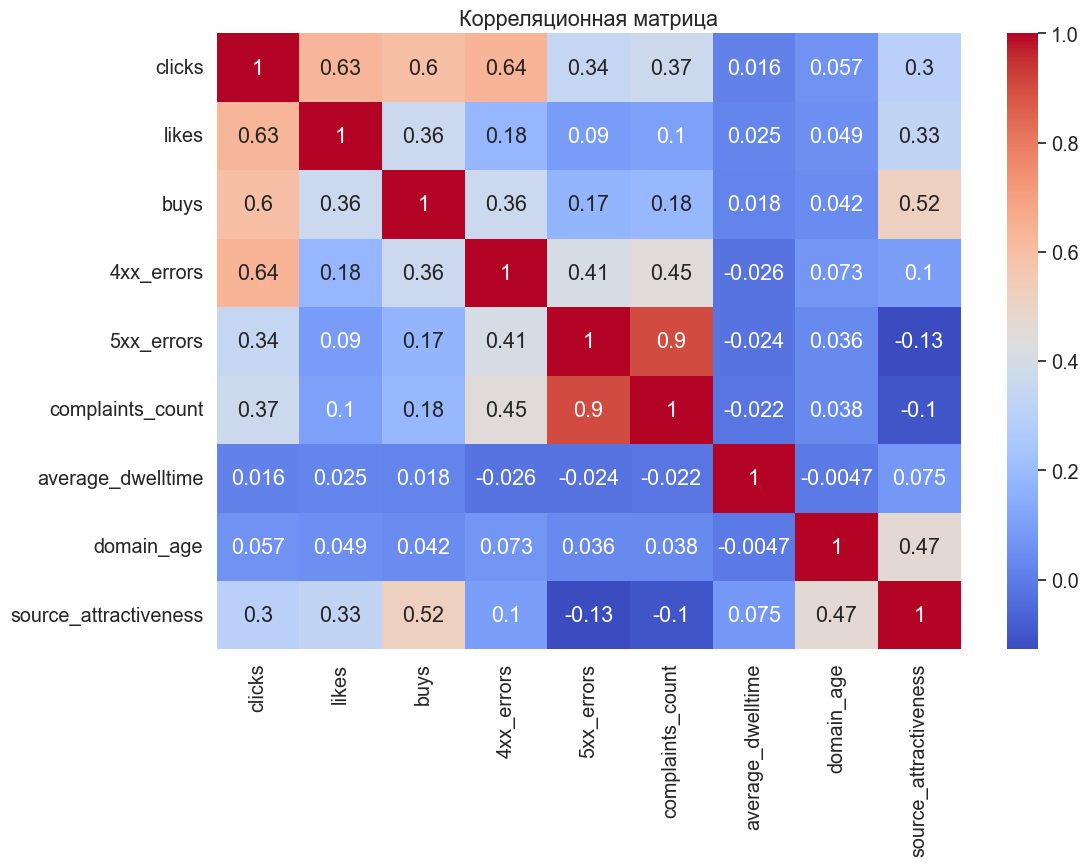

In [56]:
# Корреляционная матрица
plt.figure(figsize=(12, 8))
correlation_matrix = df[real_features + [target_features]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

По матрице корреляций видно, что clicks, buys, likes, domain_age влияют больше всего на таргет
1) Чем больше покупок совершено на сайте, тем он привлекательнее
2) Чем дольше срок существования сайта, тем он привлекательнее
3) Чем больше ошибок 5xx, тем сайт менее привлекателен
4) Чем больше жалоб на сайте, тем он менее привлекателен

In [57]:
import warnings
warnings.filterwarnings('ignore')

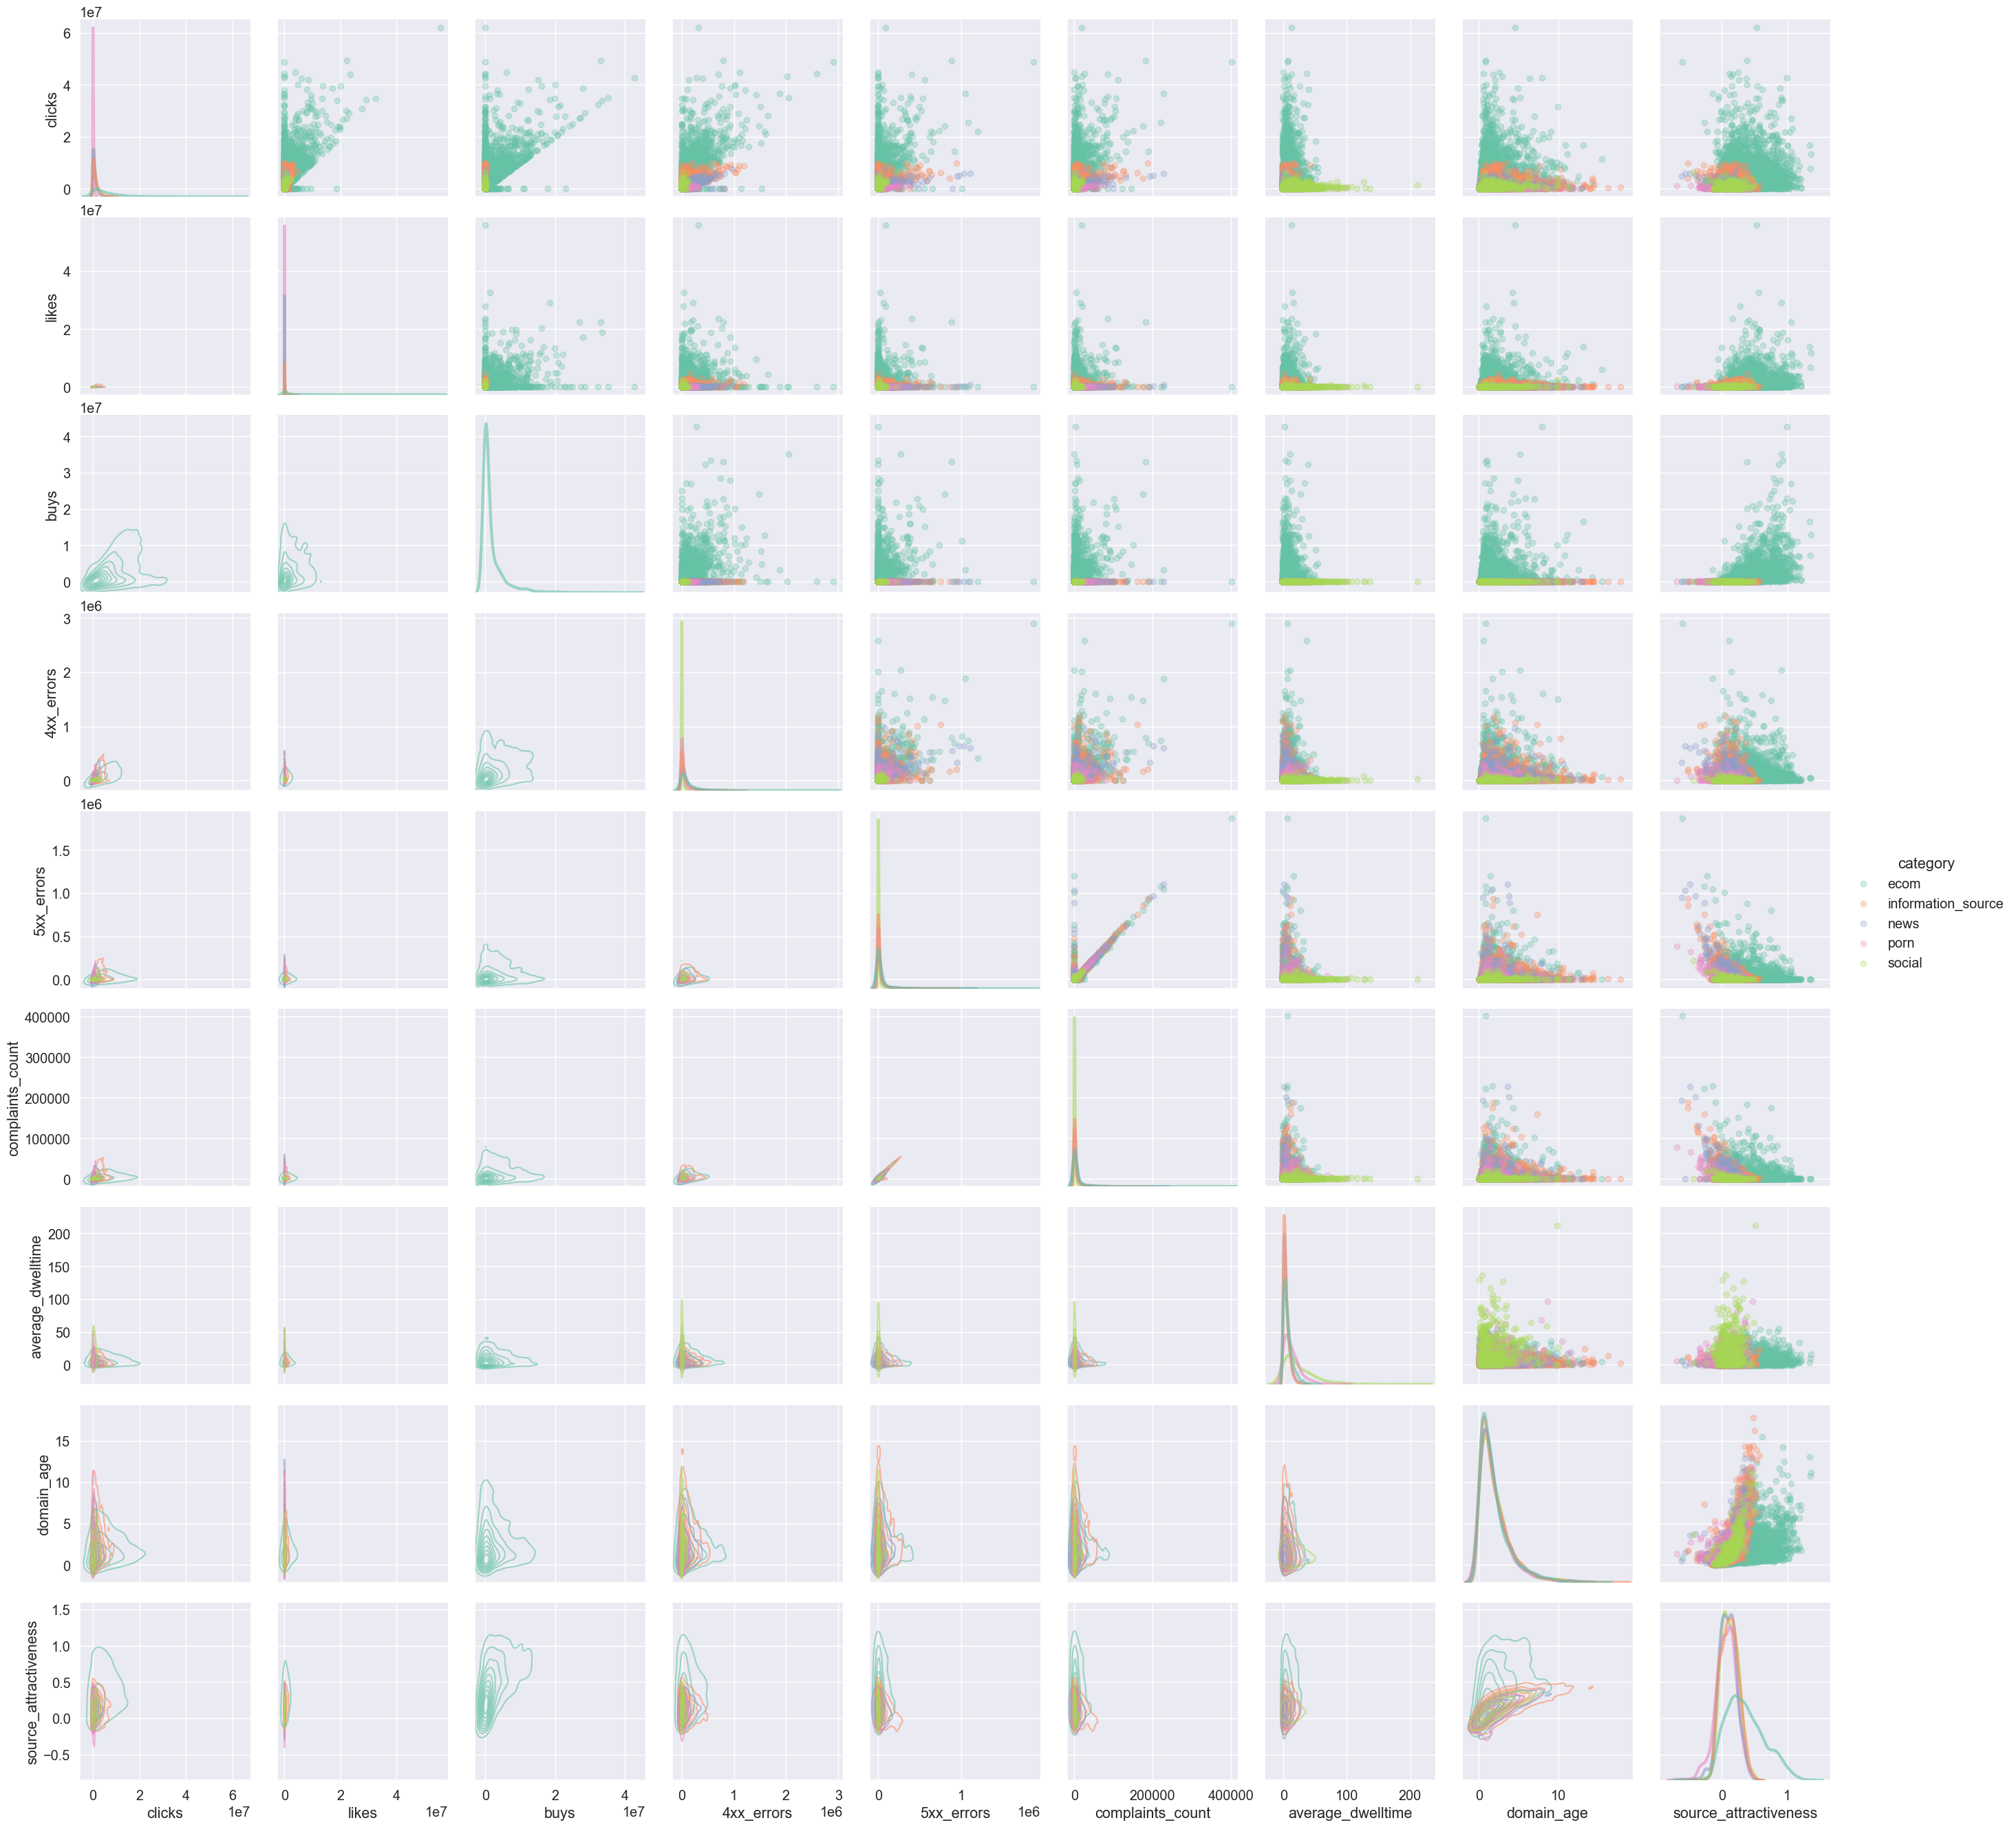

In [58]:
for hue in categorial_features:
    g = sns.PairGrid(df[[*(real_features + [target_features]), hue]], hue=hue, diag_sharey=False, height=3)
    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, common_norm=False)
    g.add_legend()

ПО графику видно, что:
1) Для разных категорий сайтов, уровень привлекательности немного рознится
2) Видим линейную зависимость количества жалоб от количества ошибок 5xx
3) Нет покупок без кликов... Также и с лайками
4) Можно увидеть некую классификацию(скопление множества точек `domain_age` and `average_dwelltime` от `source_affectivness`), Это значит, что схожие по категории сайты выдают примерно одинавый результат для нашего таргета
5) На `ecom` сайтах обычно используются `likes` and `buys`, там же собрано большое количество кликов

# Подготовка и очистка данных

Я решил занулить все значения NaN во всех данных, просто первое, что пришло в голову, ведь в датасете и так много нулей, при таком соотношении может есть большая погрешность, но меня это не остановило.

In [60]:
df['complaints_count'] = pd.to_numeric(df['complaints_count'], errors='coerce')
df.fillna(0, inplace=True)


Теперь будем готовить данные для дальнейшего обучения

In [61]:
def print_shape(data):
    shape = data.shape
    print("Rows:", shape[0])
    print("Cols:", shape[1])

Разделим наш датасет на `train` and `test`

In [62]:
train, test = train_test_split(df, test_size=0.2)

print_shape(train)

print_shape(test)

Rows: 6400
Cols: 12
Rows: 1600
Cols: 12


Категориальный признак придется приподнести в другом формате(числовом), воспльзуемся One-Hot Encoder

In [64]:
encoder = OneHotEncoder(drop='first',sparse_output=False)
train_cat = encoder.fit_transform(train[categorial_features])
train_cat

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [65]:
encoder.categories_

[array(['ecom', 'information_source', 'news', 'porn', 'social'],
       dtype=object)]

Tеперь соединим полученный категориальный признак в числовом виде

In [66]:
X_train = np.hstack([train[real_features], train_cat])
print_shape(X_train)

Rows: 6400
Cols: 12


# Обучение и тестирование модели

In [69]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, train[target_features])

LinearRegression()

In [70]:
model.coef_

array([-1.22090254e-08,  1.98126380e-08,  4.72284314e-08,  7.86026950e-09,
       -5.56518042e-07,  1.92022741e-07,  1.83698720e-03,  5.25500188e-02,
       -1.90440417e-01, -2.13533679e-01, -2.63780525e-01, -2.39257905e-01])

In [71]:
model.intercept_

0.2195506956520169

Протестируем и оценим нашу модель

In [72]:
test_cat = encoder.transform(test[categorial_features])
X_test = np.hstack([test[real_features], test_cat])

In [73]:
test_preds = model.predict(X_test)

Получим наш предварительный MSE

In [74]:
metrics.mean_squared_error(test[target_features], test_preds, squared=False)

0.1275388101427772

In [75]:
metrics.mean_absolute_error(test[target_features], test_preds)

0.08663257719001777

In [76]:
metrics.mean_absolute_percentage_error(test[target_features], test_preds) * 100

192.97538702854237

MAPE Тут выражен в %, но его используют, когда в таргете сильный разброс, у нас же все в пределе одного порядка

In [77]:
train_preds = model.predict(X_train)

metrics.mean_squared_error(train[target_features], train_preds, squared=False), \
metrics.mean_absolute_error(train[target_features], train_preds), \
metrics.mean_absolute_percentage_error(train[target_features], train_preds) * 100

(0.12737545560363758, 0.08803985829412596, 243.46731112873655)

Сделаем нормализацию

## Нормализация

In [82]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train
X_test

array([[-0.30626884, -0.28787242, -0.25249157, ..., -0.33506675,
        -0.22941573,  4.38055641],
       [-0.48587501, -0.28787242, -0.25249157, ..., -0.33506675,
        -0.22941573,  4.38055641],
       [ 5.72602077,  3.56177864, -0.25249157, ..., -0.33506675,
        -0.22941573, -0.2282815 ],
       ...,
       [ 1.85742183,  1.94548217, -0.25249157, ..., -0.33506675,
        -0.22941573, -0.2282815 ],
       [ 0.09624244,  0.49799349, -0.25249157, ..., -0.33506675,
        -0.22941573, -0.2282815 ],
       [-0.51208528, -0.28787242, -0.25249157, ..., -0.33506675,
        -0.22941573, -0.2282815 ]])

Тут я заново кодирую категориальные признаки, чтобы потом весь датасет делить на `train` `test`. Поменял местами действия

In [83]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
df_cat_encoded = encoder.fit_transform(df[categorial_features])

X = np.hstack([df[real_features], df_cat_encoded]) # фичи
y = df['source_attractiveness']  # Таргет

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=None)


Регуляризация (Модель Ridge  {L2})

In [84]:
# Обучение модели Ridge
ridge_model = Ridge(alpha=0.1, fit_intercept=True)
ridge_model.fit(X_train, y_train)

# Прогнозирование
y_pred_ridge = ridge_model.predict(X_test)

In [85]:
model.intercept_

0.2195506956520169

In [86]:
model.coef_

array([-1.22090254e-08,  1.98126380e-08,  4.72284314e-08,  7.86026950e-09,
       -5.56518042e-07,  1.92022741e-07,  1.83698720e-03,  5.25500188e-02,
       -1.90440417e-01, -2.13533679e-01, -2.63780525e-01, -2.39257905e-01])

Оценка модели

In [88]:
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression - MSE: {ridge_mse}, R^2: {ridge_r2}')



Ridge Regression - MSE: 0.017182124354400776, R^2: 0.691704372973083


# Sumbit 

In [89]:
data_path = 'train.csv' 
train_data = pd.read_csv(data_path)
    
train_data['complaints_count'] = pd.to_numeric(train_data['complaints_count'], errors='coerce')
train_data.fillna(0, inplace=True)

train_data['date_of_registration'] = pd.to_datetime(train_data['date_of_registration'], errors='coerce')
train_data['domain_age'] = (pd.Timestamp('2024-10-15') - train_data['date_of_registration']) / pd.Timedelta(days=365)

categorial_features = ['category'] # категориальный
real_features = ['clicks', 'likes', 'buys', '4xx_errors', '5xx_errors', 'complaints_count', 'average_dwelltime', 'domain_age'] # вещественные

encoder = OneHotEncoder(drop='first', sparse_output=False)
train_cat = encoder.fit_transform(train_data[categorial_features])

# Объединение числовых и категориальных признаков
X_train = np.hstack([train_data[real_features].values, train_cat])
y_train = train_data['source_attractiveness'] 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train)

model = ridge_model
scaler = scaler
encoder = encoder

In [93]:
def predict(data_path):

    data = pd.read_csv(data_path)
    
    data['complaints_count'] = pd.to_numeric(data['complaints_count'], errors='coerce')
    data.fillna(0, inplace=True)
    data['date_of_registration'] = pd.to_datetime(data['date_of_registration'], errors='coerce')
    data['domain_age'] = (pd.Timestamp('2024-10-15') - data['date_of_registration']) / pd.Timedelta(days=365)
    
    # Применение One-Hot Encoding для категориальных переменных
    data_cat = encoder.transform(data[categorial_features])
    
    # Объединение числовых и категориальных признаков
    X = np.hstack([data[real_features].values, data_cat])
    
    
    X_scaled = scaler.transform(X)

    
    predictions = model.predict(X_scaled)

    data = {
        "source_attractiveness": predictions
    }
    submit = pd.DataFrame(data)
    submit.to_csv('submission.csv', index_label="ID")
    
    with open('output.csv', 'w') as file:
        for predict in predictions:
            file.write(str(predict) + '\n')


In [94]:
predict('test.csv')